<a href="https://colab.research.google.com/github/selcanatak2629/MachineLearning/blob/master/MachineLearning_SupportVectorRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
ln: failed to create symbolic link '/mydrive/My Drive': File exists
 Artificial_Intelligence	     mask_test_images
 Cognitiwe			     MyDrive
'Colab Notebooks'		    'My Drive'
 customTF2			    'Selcan_ATAK_CV (1).pdf'
 customTF22			    'Selcan_ATAK_CV (2).pdf'
 KafkaCloudKurulumNotlari_yeni.txt   Selcan_ATAK_CV.pdf
 local_pc			     titanic
 maske_algilama			     yolov4


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [4]:
%cd /content/gdrive/MyDrive/Artificial_Intelligence/MachineLearningData

/content/gdrive/MyDrive/Artificial_Intelligence/MachineLearningData


In [5]:
#data preprocessing
datas = pd.read_csv('salaries.csv')
print(datas)

              unvan  Egitim Seviyesi   maas
0             Cayci                1   2250
1          Sekreter                2   2500
2  Uzman Yardimcisi                3   3000
3             Uzman                4   4000
4  Proje Yoneticisi                5   5500
5               Sef                6   7500
6             Mudur                7  10000
7          Direktor                8  15000
8           C-level                9  25000
9               CEO               10  50000


In [6]:
#dataframe
x = datas.iloc[:,1:2]
y = datas.iloc[:,2:]
#numpy array dönüşüm
print(x)
print(y)

   Egitim Seviyesi
0                1
1                2
2                3
3                4
4                5
5                6
6                7
7                8
8                9
9               10
    maas
0   2250
1   2500
2   3000
3   4000
4   5500
5   7500
6  10000
7  15000
8  25000
9  50000


In [7]:
#linear regression
lin_reg = LinearRegression()
#fit aslında train etmemizi saglayan fonksıyon
lin_reg.fit(x.values,y.values) # bizden array istiyor 

#polinomal regression x^2
poly_reg = PolynomialFeatures(degree = 2) # 2. dereceden bir obje olusturuyoruz. 
x_poly = poly_reg.fit_transform(x.values)
print(x_poly) #denklemin x^2 oldugunu sonuctan anlıyoruz

#polinomal regression x^4
poly_reg4 = PolynomialFeatures(degree = 4) # 2. dereceden bir obje olusturuyoruz. 
x_poly4 = poly_reg4.fit_transform(x.values)
print(x_poly4) #denklemin x^4 oldugunu sonuctan anlıyoruz

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]
[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


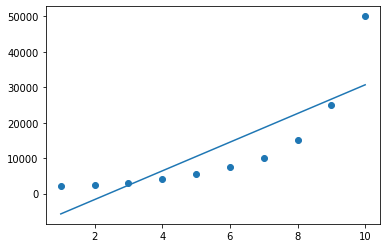

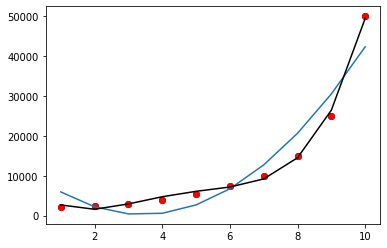

In [8]:
# Linear regression visualization
plt.scatter(x.values,y.values) # view points
plt.plot(x,lin_reg.predict(x))
plt.show()

# Polinomal regression visualization x^2
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly, y)
plt.scatter(x.values,y.values, color = 'black')
plt.plot(x.values,lin_reg2.predict(poly_reg.fit_transform(x.values)))

# Polinomal regression visualization x^4
lin_reg4 = LinearRegression()
lin_reg4.fit(x_poly4, y)
plt.scatter(x.values,y.values, color ='red')
plt.plot(x.values,lin_reg4.predict(poly_reg4.fit_transform(x.values)), color='black')

In [9]:
#Predicts
print(lin_reg.predict([[11]]))
print(lin_reg2.predict(poly_reg.fit_transform([[11]])))

[[34716.66666667]]
[[56091.66666667]]


In [12]:
X = x.values
Y = y.values
print(X,Y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]] [[ 2250]
 [ 2500]
 [ 3000]
 [ 4000]
 [ 5500]
 [ 7500]
 [10000]
 [15000]
 [25000]
 [50000]]


In [16]:
#Data Scaling
sc1 = StandardScaler()
x_olcekli = sc1.fit_transform(X)
sc2 = StandardScaler()
y_olcekli = sc2.fit_transform(Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


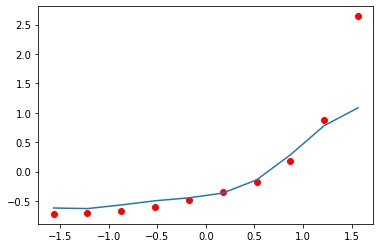

In [22]:
#Support vector regression
svr_reg = SVR(kernel = 'rbf')
svr_reg.fit(x_olcekli,y_olcekli)

plt.scatter(x_olcekli,y_olcekli,color='red')
plt.plot(x_olcekli,svr_reg.predict(x_olcekli))

In [24]:
print(svr_reg.predict(6.6))

ValueError: ignored